<a href="https://colab.research.google.com/github/patriani/RNN_LSTM_Tesla_stock/blob/main/ELT575_Semana3_ES119663.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
tesla_stock = 'https://raw.githubusercontent.com/patriani/RNN_LSTM_Tesla_stock/main/tesla_stock_2015_2022.csv'
df = read_csv(tesla_stock)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [ ]:
# Only the column 'Open' will be used as independent variables and 'Close' is the column of the dependent variables.
df_XY=pd.DataFrame(df, columns=['Open','Close'])
df_XY.head()


,Open,Close
0,51.816002,51.584000
1,52.444000,51.830002
2,52.450001,52.431999
3,52.419998,53.130001
4,53.348000,52.627998


In [ ]:
# Reshape of the target data
scaler = MinMaxScaler(feature_range=(0, 1))
df_XY_scaled = scaler.fit_transform(df_XY.values.reshape(-1, 1))

In [ ]:
# Split into train and test data (80% to train and 20% to test)
train_size = int(len(df_XY_scaled) * 0.8)
train_data = df_XY_scaled[:train_size]
test_data = df_XY_scaled[train_size:]

In [ ]:
# Prepare the input X and target Y
def get_XY(data, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(data), time_steps)
    Y = data[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = data[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 50

# Prepating the train data frame
trainX, trainY = get_XY(train_data, time_steps)

# Prepating the test data frame
testX, testY = get_XY(test_data, time_steps)

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0]))
    #model.add(Dropout(0.2))
    #model.add(SimpleRNN(hidden_units, activation=activation[1]))
    #model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=32, verbose=2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 1s - 679ms/step - loss: 0.0044 - val_loss: 0.3316
Epoch 2/20
2/2 - 0s - 216ms/step - loss: 0.0029 - val_loss: 0.2634
Epoch 3/20
2/2 - 0s - 39ms/step - loss: 0.0021 - val_loss: 0.2047
Epoch 4/20
2/2 - 0s - 69ms/step - loss: 0.0020 - val_loss: 0.1615
Epoch 5/20
2/2 - 0s - 38ms/step - loss: 0.0018 - val_loss: 0.1381
Epoch 6/20
2/2 - 0s - 37ms/step - loss: 0.0015 - val_loss: 0.1186
Epoch 7/20
2/2 - 0s - 72ms/step - loss: 0.0011 - val_loss: 0.0994
Epoch 8/20
2/2 - 0s - 40ms/step - loss: 7.3162e-04 - val_loss: 0.0805
Epoch 9/20
2/2 - 0s - 72ms/step - loss: 5.2903e-04 - val_loss: 0.0588
Epoch 10/20
2/2 - 0s - 64ms/step - loss: 3.9838e-04 - val_loss: 0.0333
Epoch 11/20
2/2 - 0s - 74ms/step - loss: 2.1861e-04 - val_loss: 0.0126
Epoch 12/20
2/2 - 0s - 69ms/step - loss: 7.0619e-05 - val_loss: 0.0048
Epoch 13/20
2/2 - 0s - 39ms/step - loss: 1.1221e-04 - val_loss: 0.0053
Epoch 14/20
2/2 - 0s - 38ms/step - loss: 2.1952e-04 - val_loss: 0.0048
Epoch 15/20
2/2 - 0s - 103ms/step - loss: 1.4672e-04

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Raíz do Erro Médio Quadrático para Treino: 0.008
Raíz do Erro Médio Quadrático para Teste: 0.134


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


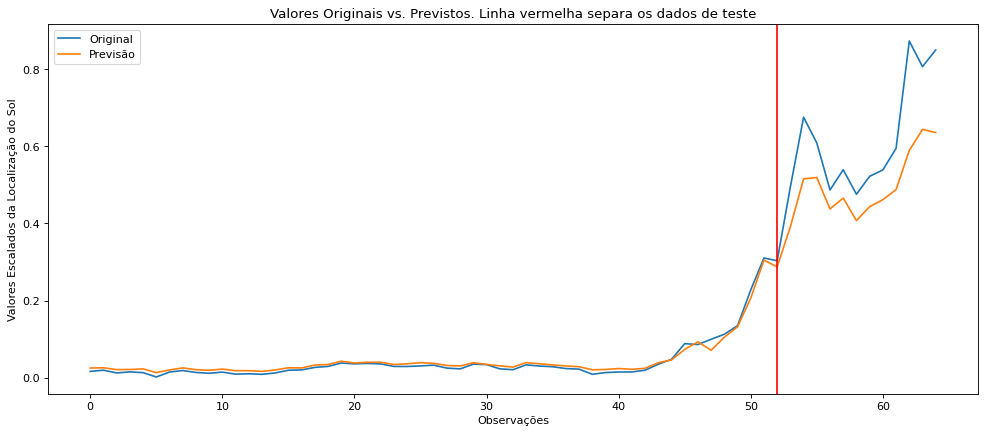

In [ ]:
# predicting
predicted = model.predict(trainX)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(testY.reshape(-1, 1))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados da Localização do Sol')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')
plot_result(trainY, testY, train_predict, test_predict)